In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys

In [2]:
df = pd.read_csv("../Dados/Brasil.IO.csv",sep=",",low_memory=False)

In [3]:
df.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,23,2020-06-03,1,PI,Acauã,2200053,city,1,14.11632,1,0,0,0.0000,7084,True,False
1,23,2020-06-03,42,PI,Água Branca,2200202,city,108,620.29751,1,7,0,0.0648,17411,True,False
2,23,2020-06-03,7,PI,Alagoinha do Piauí,2200251,city,1,13.07019,0,0,0,0.0000,7651,True,False
3,23,2020-06-03,23,PI,Alto Longá,2200301,city,11,76.90157,0,0,0,0.0000,14304,True,False
4,23,2020-06-03,50,PI,Altos,2200400,city,73,180.14016,5,4,2,0.0548,40524,True,False


In [4]:
df.describe()

,epidemiological_week,order_for_place,city_ibge_code,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019
count,4778.000000,4778.000000,4.778000e+03,4778.000000,4628.000000,4778.000000,4778.000000,4778.000000,4778.000000,4.778000e+03
mean,20.415237,19.156969,2.170193e+06,41.152156,53.869587,2.538301,1.421097,0.084554,0.098690,8.310023e+04
std,2.017516,13.895904,2.777930e+05,297.170598,74.085676,16.698671,9.831943,0.649929,0.251535,4.226084e+05
min,12.000000,1.000000,2.200000e+01,0.000000,0.091650,-5.000000,0.000000,-1.000000,0.000000,2.452000e+03
25%,19.000000,8.000000,2.202505e+06,1.000000,14.914240,0.000000,0.000000,0.000000,0.000000,5.501000e+03
50%,21.000000,16.000000,2.205581e+06,2.000000,25.808115,0.000000,0.000000,0.000000,0.000000,9.426000e+03
75%,22.000000,28.000000,2.208650e+06,7.000000,64.998380,1.000000,1.000000,0.000000,0.028850,2.091800e+04
max,23.000000,77.000000,2.211605e+06,6064.000000,622.421650,387.000000,202.000000,15.000000,1.000000,3.273227e+06


In [5]:
list(df)

['epidemiological_week',
 'date',
 'order_for_place',
 'state',
 'city',
 'city_ibge_code',
 'place_type',
 'last_available_confirmed',
 'last_available_confirmed_per_100k_inhabitants',
 'new_confirmed',
 'last_available_deaths',
 'new_deaths',
 'last_available_death_rate',
 'estimated_population_2019',
 'is_last',
 'is_repeated']

<function matplotlib.pyplot.show(*args, **kw)>

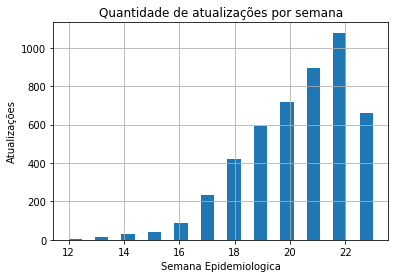

In [6]:
df.epidemiological_week.hist(bins = 23)
plt.xlabel("Semana Epidemiologica")
plt.ylabel("Atualizações")
plt.title("Quantidade de atualizações por semana")
plt.show

In [7]:
city = df.city.describe().top
city = "Água Branca"

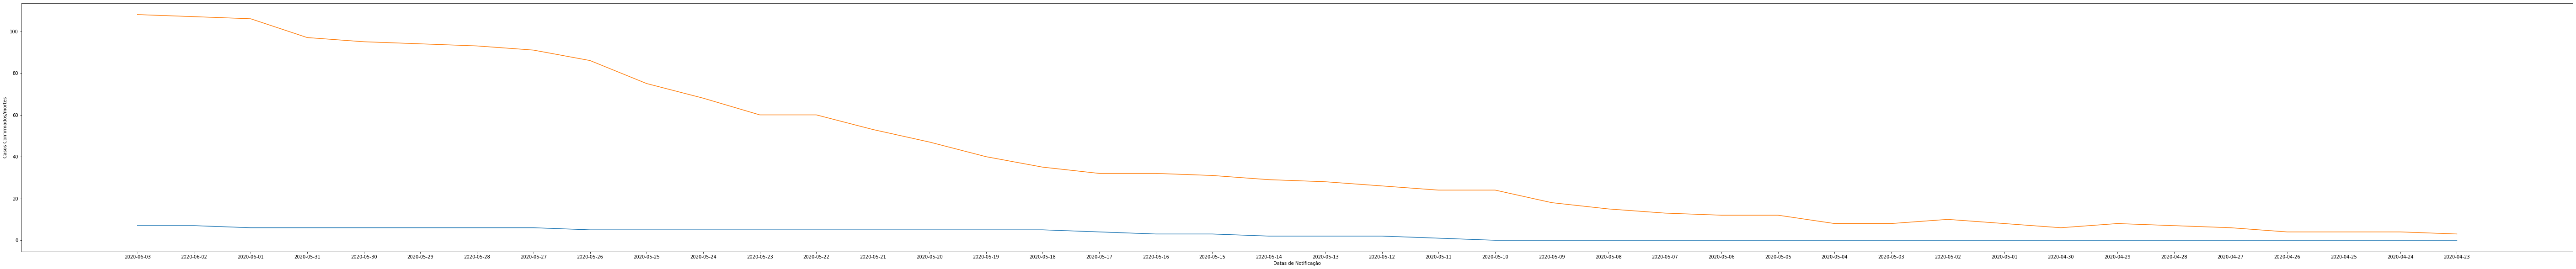

In [8]:
x = df[df.city == city].date
y_confirmed = df[df.city == city].last_available_confirmed
y_deaths = df[df.city == city].last_available_deaths
plt.rcParams['figure.figsize'] = (100,10)
plt.xlabel("Datas de Notificação")
plt.ylabel("Casos Confirmados/mortes")
plt.plot(x,y_deaths,x,y_confirmed)

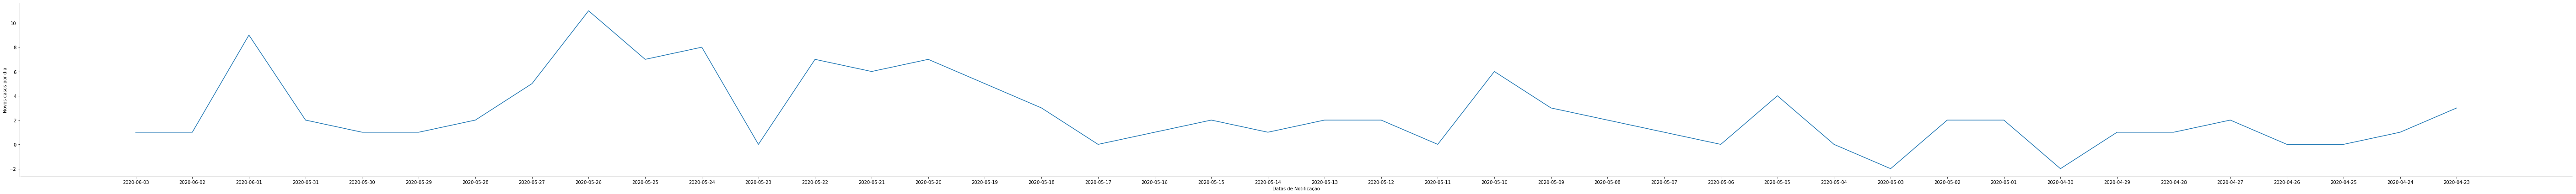

In [9]:
x = df[df.city == city].date
y = df[df.city == city].new_confirmed
plt.rcParams['figure.figsize'] = (100,7)
plt.xlabel("Datas de Notificação")
plt.ylabel("Novos casos por dia")
plt.plot(x,y)

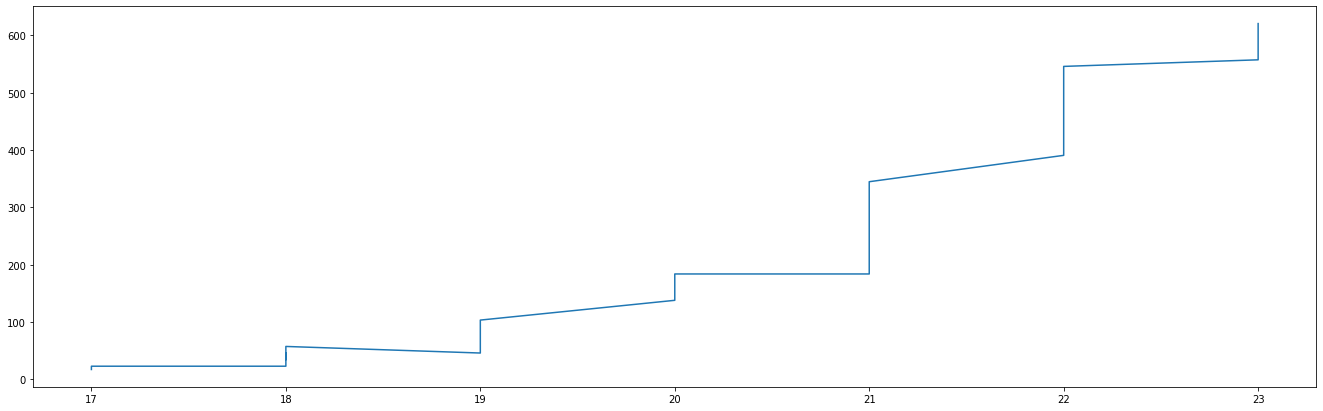

In [10]:
y = df[df.city == city].last_available_confirmed_per_100k_inhabitants
x = df[df.city == city].epidemiological_week
plt.rcParams['figure.figsize'] = (23,7)
plt.xlabel("")
plt.ylabel("")
plt.plot(x,y)

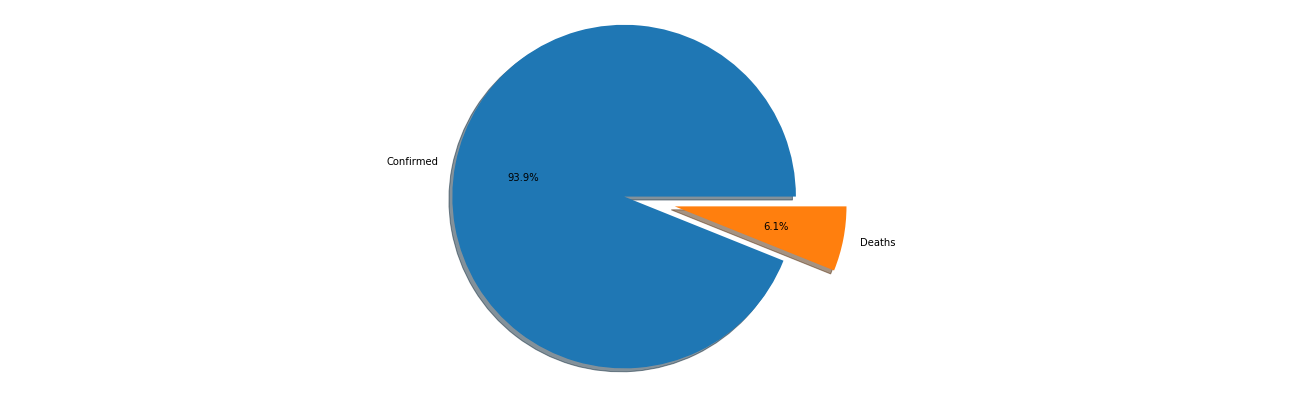

In [11]:
labels = 'Confirmed', 'Deaths'
sizes = [max(df[df.city == city].last_available_confirmed),max(df[df.city == city].last_available_deaths) ]
explode = (0.2, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()

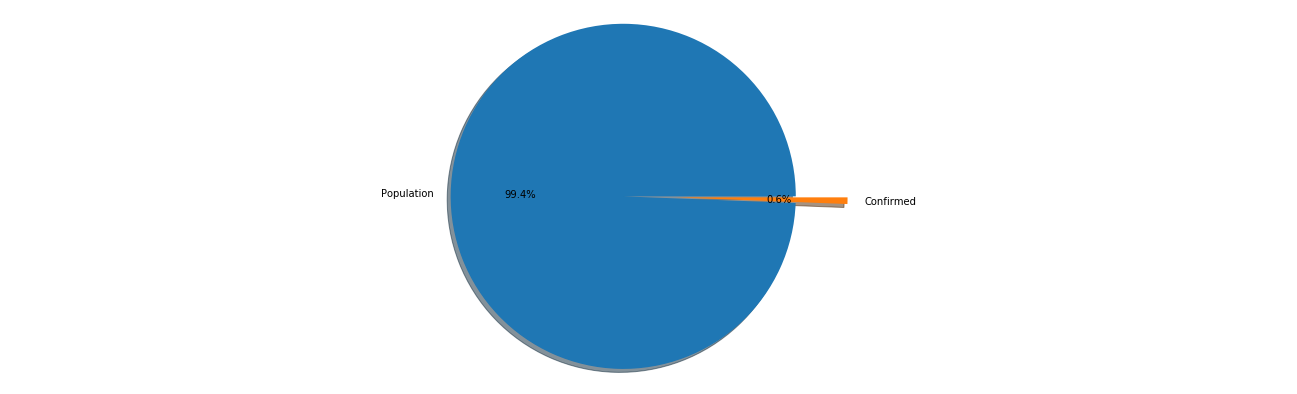

In [12]:
labels = 'Population', 'Confirmed'
sizes = [max(df[df.city == city].estimated_population_2019),max(df[df.city == city].last_available_confirmed) ]
explode = (0.2, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()